In [40]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

In [41]:
load_dotenv()

model = ChatGroq(model = "qwen/qwen3-32b")

In [42]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

In [43]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [44]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [45]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()



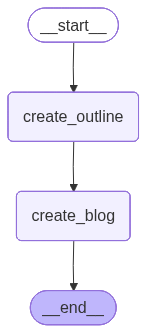

In [46]:
graph.compile()

In [47]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state['title'])

Rise of AI in India


In [48]:
print(final_state['outline'])

<think>
Okay, I need to create a detailed outline for a blog on the "Rise of AI in India." Let me start by brainstorming the key points that should be covered. First, an introduction to set the stage. Then maybe the historical perspective of AI in India. I should mention how it started, maybe the early days and government initiatives. 

Next, current developments are important. What sectors are adopting AI in India? Healthcare, education, agriculture, and finance come to mind. Each of these can be a subpoint. Also, the role of startups and big companies like Tata, Infosys, and Wipro. Don't forget the government's role here, like NITI Aayog's AI strategy and initiatives like Digital India. 

Ethical considerations and challenges are crucial too. Data privacy issues, like the Personal Data Protection Bill. There's also the challenge of the digital divide between urban and rural areas. Job displacement due to AI automation is another point. 

Future prospects would involve predictions for

In [49]:
print(final_state['content'])

<think>
Okay, I need to write a blog titled "Rise of AI in India" based on the provided outline. Let me go through each section step by step to ensure I cover all the key points and maintain a logical flow.

Starting with the introduction, I should set the stage by highlighting India's growing role in AI. Maybe mention some stats or a recent development to grab attention. For the historical perspective, I need to outline the early days, government initiatives like NITI Aayog's strategy, and how private companies started to get involved. 

Next, the current developments section requires breaking down AI adoption into sectors like healthcare, education, agriculture, and finance. I should think of specific examples for each, like startups or projects working in these areas. The government and corporate leadership part should highlight policies and how companies are contributing. 

Challenges and ethical considerations need to address data privacy issues, the digital divide, job displaceme